## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Import csv file

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
df =  pd.read_csv('/content/gdrive/My Drive/datasets/cleaned_cars.csv')
df.loc[:, ~df.columns.str.match('Unnamed')]
df.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,present_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,841000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1329000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1494967.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,900000.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,841000.0


## Shape and nature of the dataset

---



In [ ]:
print(df.shape)
print(df.dtypes)

(8128, 14)
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
present_price    float64
dtype: object


In [ ]:
df.describe()

,year,selling_price,km_driven,seats,present_price
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,8.113000e+03
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719,1.215984e+06
std,4.044249,8.062534e+05,5.655055e+04,0.959588,1.423106e+06
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000,6.154000e+05
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,8.444650e+05
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000,1.329000e+06
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,2.785448e+07


## Analysis and Pre-processing



In [ ]:
final_df = df[['name', 'year', 'owner' , 'selling_price', 'present_price', 'km_driven', 'fuel', 'seller_type', 'transmission']]
print(final_df['owner'].value_counts())

final_df = final_df.astype({"selling_price": "float64"})

for index,row in final_df.iterrows():
  final_df.at[index,'selling_price'] /= 100000
  final_df.at[index,'present_price'] /= 100000
  final_df.at[index,'present_price'] = np.round(final_df.at[index,'present_price'],2)

final_df.drop(final_df[final_df['owner']=='Test Drive Car'].index,axis=0,inplace=True)
final_df['No_of_previous_owner'] = final_df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,"Fourth & Above":4})

print(final_df.head(1))
final_df['Current Year'] = 2020
final_df['age'] = final_df['Current Year'] - final_df['year']
final_df.drop(['year','Current Year'],axis=1,inplace=True)
del final_df['owner']
print(final_df.head(1))
print(final_df.shape)

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
                     name  year  ... transmission  No_of_previous_owner
0  Maruti Swift Dzire VDI  2014  ...       Manual                   1.0

[1 rows x 10 columns]
                     name  selling_price  ...  No_of_previous_owner  age
0  Maruti Swift Dzire VDI            4.5  ...                   1.0    6

[1 rows x 9 columns]
(8123, 9)


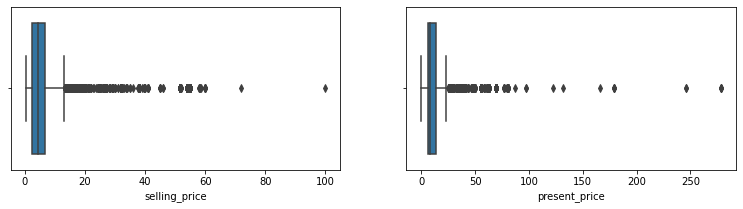

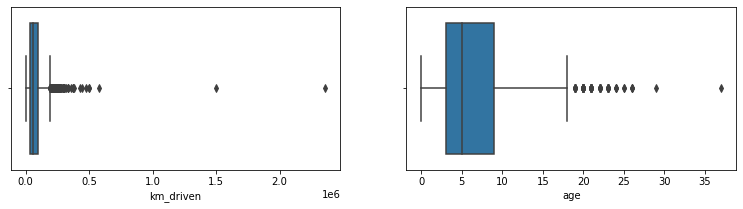

In [ ]:
num_cols = ['selling_price','present_price','km_driven','age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=final_df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=final_df)
    i += 1
    
    plt.show()

In [ ]:
final_df = final_df[final_df['present_price'] < final_df['present_price'].quantile(0.99)]

In [ ]:
final_df = final_df[final_df['selling_price'] < final_df['selling_price'].quantile(0.99)]

In [ ]:
final_df = final_df[final_df['km_driven'] < final_df['km_driven'].quantile(0.99)]

In [ ]:
final_df = final_df[final_df['age'] < final_df['age'].quantile(0.99)]

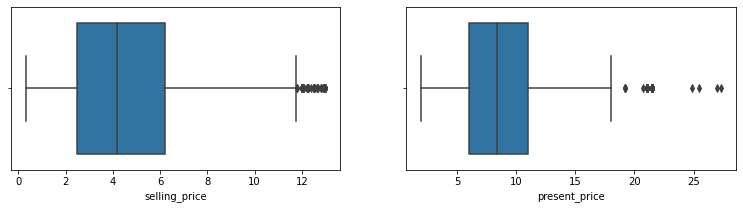

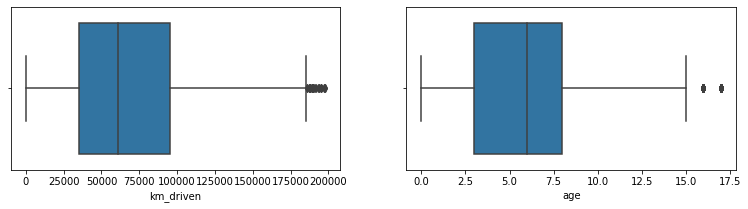

In [ ]:
num_cols = ['selling_price','present_price','km_driven','age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=final_df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=final_df)
    i += 1
    
    plt.show()

In [ ]:
print(final_df.shape)
print(final_df.dtypes)

(7151, 9)
name                     object
selling_price           float64
present_price           float64
km_driven                 int64
fuel                     object
seller_type              object
transmission             object
No_of_previous_owner    float64
age                       int64
dtype: object


## Brief report on missing values

In [ ]:
print(round(100*(final_df.isnull().sum()/len(final_df)),2).sort_values(ascending = False)) # column
print(round(100*(final_df.isnull().sum(axis=1)/len(final_df)),2).sort_values(ascending = False)) # row

No_of_previous_owner    2.0
age                     0.0
transmission            0.0
seller_type             0.0
fuel                    0.0
km_driven               0.0
present_price           0.0
selling_price           0.0
name                    0.0
dtype: float64
5082    0.01
852     0.01
4254    0.01
275     0.01
6825    0.01
        ... 
5428    0.00
5429    0.00
5431    0.00
5432    0.00
0       0.00
Length: 7151, dtype: float64


## Drop duplicates

In [ ]:
del final_df['name']

In [ ]:
final_df.drop_duplicates(subset=None, inplace=True)
print(final_df.shape)

(6245, 8)


In [ ]:
for val in ['seller_type:Trustmark Dealer','fuel:LPG']:
  query = val.split(":")
  final_df = final_df[final_df[query[0]] != query[1]]

## Multivariate analysis

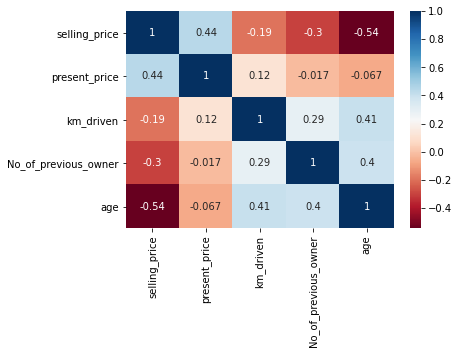

In [ ]:
import seaborn as sns
final_df.dropna(inplace=True)
sns.heatmap(final_df.corr(method ='kendall'), annot=True, cmap="RdBu")
plt.show()

In [ ]:
final_df.pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,Petrol
seller_type,,,
Dealer,NaN,6.281694,4.856938
Individual,3.105576,5.154667,3.463433


In [ ]:
final_df.pivot_table(values='selling_price', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,6.977343,5.454831
Individual,6.251245,4.251033


In [ ]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df.head()

,selling_price,present_price,km_driven,No_of_previous_owner,age,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual
0,4.50,8.41,145500,1.0,6,1,0,1,1
1,3.70,13.29,120000,2.0,6,1,0,1,1
2,1.58,14.95,140000,3.0,14,0,1,1,1
3,2.25,9.00,127000,1.0,10,1,0,1,1
4,1.30,8.41,120000,1.0,13,0,1,1,1


In [ ]:
print(final_df.shape)
print(final_df.dtypes)

(6047, 9)
selling_price             float64
present_price             float64
km_driven                   int64
No_of_previous_owner      float64
age                         int64
fuel_Diesel                 uint8
fuel_Petrol                 uint8
seller_type_Individual      uint8
transmission_Manual         uint8
dtype: object


## Create a Model

In [ ]:
Y = final_df['selling_price']
X = final_df.drop('selling_price',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

In [ ]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4051, 8)
x test:  (1996, 8)
y train:  (4051,)
y test:  (1996,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Linear Regression

Train R2-score : 0.75
Test R2-score : 0.77
Train CV scores : [0.75383199 0.74924523 0.74238688 0.76410457 0.75409361]
Train CV mean : 0.75


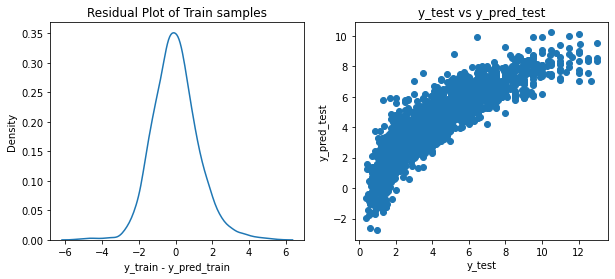

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Ridge Regression

Train R2-score : 0.75
Test R2-score : 0.77
Train CV scores : [0.75383401 0.74924034 0.74243585 0.76415122 0.75396556]
Train CV mean : 0.75


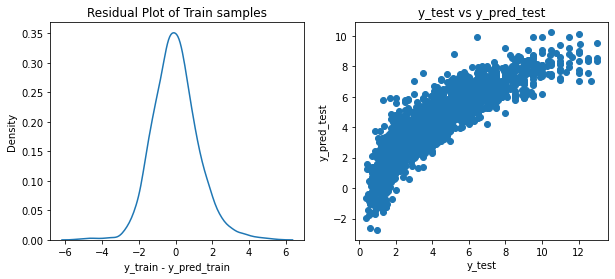

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Lasso Regression

Train R2-score : 0.75
Test R2-score : 0.77
Train CV scores : [0.75372415 0.74917782 0.74250174 0.7643411  0.75364361]
Train CV mean : 0.75


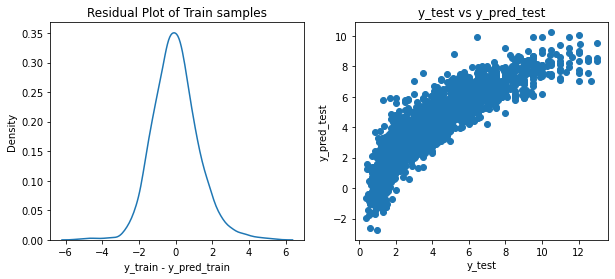

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_pred_model(ls_rs,"lasso.pkl")

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.91
Test R2-score : 0.88
Train CV scores : [0.88106776 0.87025344 0.87840815 0.87388317 0.85865205]
Train CV mean : 0.87


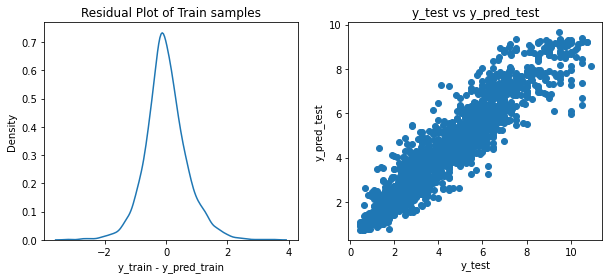

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')

In [ ]:
final_df.head()

,selling_price,present_price,km_driven,No_of_previous_owner,age,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual
0,4.50,8.41,145500,1.0,6,1,0,1,1
1,3.70,13.29,120000,2.0,6,1,0,1,1
2,1.58,14.95,140000,3.0,14,0,1,1,1
3,2.25,9.00,127000,1.0,10,1,0,1,1
4,1.30,8.41,120000,1.0,13,0,1,1,1


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.94
Test R2-score : 0.9
Train CV scores : [0.89104481 0.89075512 0.88680439 0.89023684 0.87166735]
Train CV mean : 0.89


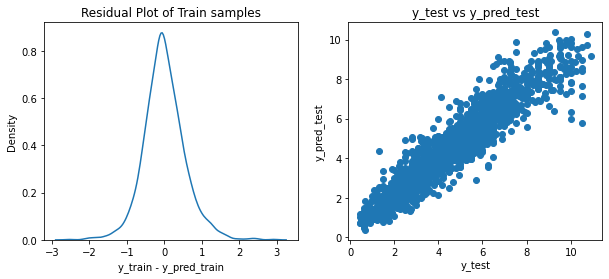

In [ ]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","Gradient Boosting"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.78,0.77,0.77
1,Ridge,0.78,0.77,0.77
2,Lasso,0.77,0.77,0.77
3,RandomForestRegressor,0.91,0.88,0.87
4,Gradient Boosting,0.94,0.90,0.89
